In [0]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from decimal import Decimal
import mimetypes
import urllib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, FuncFormatter
import configparser
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from matplotlib import rc
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)
# import google colab to use google colab as editor
# if you use other editor, do not need to import google.colab here
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
## setting path
# get current path
path_current = os.getcwd()
# the path is where the dataset saved
path = path_current + '/gdrive/My Drive/Visualization/Data/'
path_conf = path_current + '/gdrive/My Drive/Visualization/'
# the "path_img" is the position where final image will be saved
path_img = path_current + '/gdrive/My Drive/Visualization/Images/'

In [0]:
print(path_current)

/content


# Line Class
- define Single Line Plot
- define Multi-line Plot
- define Multi-line With Different Marks Plot
- define Double Axis Line Plot
- define Insetplot Line

In [0]:
class line_chart:
  def __init__(self, plotwidth=10, plothight=6, gridlinewidth=0.5, linewidth=2,
               isframe=True, my_font='DejaVu Sans', xy_lim=True, ticks=True,
               tick_direction='out', backgrid=True, title=False, save_image=False):
    
    self.plotwidth = plotwidth
    self.plothight = plothight
    self.gridlinewidth = gridlinewidth
    self.linewidth = linewidth
    self.isframe = isframe
    self.my_font = my_font
    self.xy_lim = xy_lim
    self.ticks = ticks
    self.tick_direction = tick_direction
    self.backgrid = backgrid
    self.title = title
    self.save_image = save_image
  
  ## read file function: read three kinds of format file csv/excel/text
  # if you have other format of file, please change the function manually
  def read_file(self, file):
    file_url = urllib.request.pathname2url(file)
    ftype = mimetypes.guess_type(file_url, strict=True)[0]

    ## read data file according to its formate, default includes three types of files: csv/excel/text
    # read csv format data from the parking dataset
    if 'csv' in ftype:
      # usecols: return a subset of the columns, here choose one column to use in the line chart
      data = pd.read_csv(path+file)
    # read excel format data from the parking dataset
    elif 'sheet' in ftype:
      data = pd.read_excel(path+file)
    # read text format data from the parking dataset
    elif ftype == 'text/plain':
      data = pd.read_csv(path+file, sep="\t")
    else:
      print("File type cannot find!")
    return data
  
  ## read config file
  def readConfig(self):
    cf = configparser.ConfigParser()
    #read config
    cf.read(path_conf+"parameter.conf")
  
  ## lineSingle function, data visualisation of single line plot
  # file: file name of your data source
  # plotwidth: width of the plot, two columns paper default set to 3
  # plothight: hight of the plot, two columns paper default set to 2
  # gridlinewidth: if backgrid is True, grid linewidth is the line width of background grid
  # linewidth: linewidth of the lines in the plot, default set to 2.0
  # xaxis_start: if the xy_lim is True, the x axis starts from xaxis_start
  # yaxis_start: if the xy_lim is True, the y axis starts from yaxis_start
  # my_font: the typeface of x, y lables
  # xy_lim: True or False as options. If it is True, add x and y axis' value range.
  # ticks: True or False as options. If it is True, add ticks of x and y axis.
  # tick_direction: "out", "inout" and "in" options.
  # backgrid: True or False as options;
  # if it is True, add grid in background of the plot, if it is false, the background set to white
  # title: True or False as options. If it is True, add title for the plot
  def lineSingle(self, file, col_name, x_lable, y_lable, plotwidth=10, plothight=6, gridlinewidth=0.5, linewidth=2,
                 linecolor='tab:blue',xaxis_start=0, yaxis_start=0, isframe=True, my_font='DejaVu Sans', labeltext_size=18,
                 tick_size=14, title_size=20, xy_lim=True, ticks=True, tick_direction='out', backgrid=True, title=False,
                 save_image=False):
    
    ## read file
    data = self.read_file(file)
    data = data[col_name]

    # color labels setting
    color = ['gray']

    ## plot size setting
    # figsize: the size of the line chart, (width,hight)
    fig, ax = plt.subplots(figsize =(self.plotwidth, self.plothight))

    ## background grid setting
    if self.backgrid == True:
      ax.grid(linestyle="--", linewidth=self.gridlinewidth, color=color[0], alpha=0.5)
    elif self.backgrid == False:
      pass

    # use the plot function
    # linewidth: the line width, here set to 2
    sns.lineplot(data=data, linewidth=self.linewidth, color=linecolor)

    ## x,y axis range limitation
    if self.xy_lim == True:
      # x axis valure start from xaxis_start value, and end in max of the data add a small range of value
      ax.set_xlim(xaxis_start, max(data.index)+max(data.index)/50)
      # y axis valure start from yaxis_start value, and end in max of the data add a small range of value
      ax.set_ylim(yaxis_start, data.max()+data.max()/50+10)
    elif self.xy_lim == False:
      pass

    if self.ticks == True:
      # marking detailed ticks
      # set x axis' detailed ticks label to 5 segments
      ax.xaxis.set_minor_locator(AutoMinorLocator(5))
      # set y axis' detailed ticks label to 5 segments
      ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    elif self.ticks == False:
      pass

    ## size of numbers on the ticks of x,y axis' setting
    for tick in ax.xaxis.get_major_ticks():
      tick.label.set_fontsize(tick_size)
    for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(tick_size)  

    ## x, y axis setting
    # fontsize: x, y title size
    # labelpad: scalar, optional, default: None 
    ax.set_xlabel(x_lable, fontproperties=self.my_font, fontsize=labeltext_size, labelpad=10)
    ax.set_ylabel(y_lable, fontproperties=self.my_font, fontsize=labeltext_size, labelpad=10)

    # if False, top and right borders removing
    if self.isframe == True:
      pass
    elif self.isframe == False:
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)

    ## set x, y tick's direction, default:out, can be set to in,out,inout
    if self.tick_direction == 'in':
      matplotlib.rcParams['xtick.direction'] = 'in'
      matplotlib.rcParams['ytick.direction'] = 'in'
    elif self.tick_direction == 'inout':
      matplotlib.rcParams['xtick.direction'] = 'inout'
      matplotlib.rcParams['ytick.direction'] = 'inout'
    elif self.tick_direction == 'out':
      matplotlib.rcParams['xtick.direction'] = 'out'
      matplotlib.rcParams['ytick.direction'] = 'out'

    ## title and position
    if self.title == True:
      ax.set_title('Title', fontsize=title_size, loc='center')
    elif self.title == False:
      pass

    ## save image as pdf to path folder
    # bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
    if self.save_image == True:
      plt.savefig(path_img+'line_single.pdf', bbox_inches='tight')
    elif self.save_image == False:
      pass
    # showing the image
    plt.show()

  ## linesMulti function, data visualisation of single line plot
  # file: file name of your data source
  # plotwidth: width of the plot, two columns paper default set to 3
  # plothight: hight of the plot, two columns paper default set to 2
  # gridlinewidth: if backgrid is True, grid linewidth is the line width of background grid
  # linewidth: linewidth of the lines in the plot, default set to 2.0
  # xaxis_start: if the xy_lim is True, the x axis starts from xaxis_start
  # yaxis_start: if the xy_lim is True, the y axis starts from yaxis_start
  # my_font: the typeface of x, y lables
  # xy_lim: True or False as options. If it is True, add x and y axis' value range.
  # ticks: True or False as options. If it is True, add ticks of x and y axis.
  # tick_direction: "out", "inout" and "in" options.
  # backgrid: True or False as options;
  # if it is True, add grid in background of the plot, if it is false, the background set to white
  # title: True or False as options. If it is True, add title for the plot
  def linesMulti(self, file, col_one, col_two, col_three, col_four, legend_lable1, legend_lable2, legend_lable3, 
                 legend_lable4, x_lable, y_lable, plotwidth=10, plothight=6, gridlinewidth=0.5, linewidth=2, 
                 linecolor1='tab:blue', linecolor2='tab:red', linecolor3='tab:orange', linecolor4='tab:green',
                 labeltext_size=18, tick_size=14, title_size=20, isframe=True, my_font='DejaVu Sans', ticks=True,
                 tick_direction='out', backgrid=True, title=False, save_image=False):
    ## read file
    data = self.read_file(file)
    ## load each line/column from data
    line_one = data[col_one]
    line_two = data[col_two]
    line_three = data[col_three]
    line_four = data[col_four]

    # color labels setting
    #color = ['gray', 'tab:blue', 'tab:red', 'tab:orange', 'tab:green']
    color = ['gray']

    ## plot size setting
    # figsize: the size of the line chart, (width,hight)
    fig, ax = plt.subplots(figsize =(self.plotwidth, self.plothight))

    ## background grid setting
    if self.backgrid == True:
      ax.grid(linestyle="--", linewidth=self.gridlinewidth, color=color[0], alpha=0.5)
    elif self.backgrid == False:
      pass

    # use the plot function
    # linewidth: the line width, here set to 2
    sns.lineplot(data=line_one, label=legend_lable1, linewidth=self.linewidth, color=linecolor1)
    sns.lineplot(data=line_two, label=legend_lable2, linewidth=self.linewidth, color=linecolor2)
    sns.lineplot(data=line_three, label=legend_lable3, linewidth=self.linewidth, color=linecolor3)
    sns.lineplot(data=line_four, label=legend_lable4, linewidth=self.linewidth, color=linecolor4)

    if self.ticks == True:
      # marking detailed ticks
      # set x axis' detailed ticks label to 5 segments
      ax.xaxis.set_minor_locator(AutoMinorLocator(5))
      # set y axis' detailed ticks label to 5 segments
      ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    elif self.ticks == False:
      pass

    ## size of numbers on the ticks of x,y axis' setting
    for tick in ax.xaxis.get_major_ticks():
      tick.label.set_fontsize(tick_size)
    for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(tick_size)  

    ## x, y axis setting
    # fontsize: x, y title size
    # labelpad: scalar, optional, default: None 
    ax.set_xlabel(x_lable, fontproperties=self.my_font, fontsize=labeltext_size, labelpad=10)
    ax.set_ylabel(y_lable, fontproperties=self.my_font, fontsize=labeltext_size, labelpad=10)

    # if False, top and right borders removing
    if self.isframe == True:
      pass
    elif self.isframe == False:
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)

    ## set x, y tick's direction, default:out, can be set to in,out,inout
    if self.tick_direction == 'in':
      matplotlib.rcParams['xtick.direction'] = 'in'
      matplotlib.rcParams['ytick.direction'] = 'in'
    elif self.tick_direction == 'inout':
      matplotlib.rcParams['xtick.direction'] = 'inout'
      matplotlib.rcParams['ytick.direction'] = 'inout'
    elif self.tick_direction == 'out':
      matplotlib.rcParams['xtick.direction'] = 'out'
      matplotlib.rcParams['ytick.direction'] = 'out'

    ax.legend(fontsize=8)

    ## title and position
    if self.title == True:
      ax.set_title('Title', fontsize=title_size, loc='center')
    elif self.title == False:
      pass

    ## save image as pdf to path folder
    # bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
    if self.save_image == True:
      plt.savefig(path_img+'line_multi.pdf', bbox_inches='tight')
    elif self.save_image == False:
      pass
    # showing the image
    plt.show()

  ## linesMultimarks function, data visualisation of multi-lines plot
  # file: file name of your data source
  # plotwidth: width of the plot
  # plothight: hight of the plot
  # gridlinewidth: if backgrid is True, grid linewidth is the line width of background grid
  # linewidth: linewidth of the lines in the plot, default set to 2.0
  # legend_size: size of legend
  # my_font: the typeface of x, y lables
  # present_linevalue: True or False as options; if True, mark values on line points
  # ticks: True or False as options. If it is True, add ticks of x and y axis.
  # tick_direction: "out", "inout" and "in" options.
  # backgrid: True or False as options;
  # if it is True, add grid in background of the plot, if it is false, the background set to white
  # title: True or False as option. If it is True, add title for the plot
  def linesMultimarks(self, file, x_lable, y_lable, plotwidth=10, plothight=6, gridlinewidth=0.5, linewidth=2.0, 
                      legend_size=10, labeltext_size=18, tick_size=14, title_size=20, isframe=True, my_font='DejaVu Sans',
                      present_linevalue=True, ticks=True, minor_number=False, tick_direction='out', backgrid=True,
                      title=False, save_image=False):
    # read csv format data from the dataset
    data = self.read_file(file)

    # marker labels setting 
    marker = ['o','v','D','X','P']
    # linestyle labels setting 
    linestyle = ['-',':','-.','--','-']
    # color labels setting 
    color = ['goldenrod','black','gray']

    # plot size setting 
    fig, ax = plt.subplots(figsize=(self.plotwidth, self.plothight))

    ## background grid setting
    if self.backgrid == True:
      ax.grid(linestyle="--", linewidth=self.gridlinewidth, color=color[2], alpha=0.5)
    elif self.backgrid == False:
      pass

    ## drawing plot
    # linewidth: the line width, here set to 2
    plt.plot('X', 'Y1', data=data, marker=marker[0], markersize=8, linestyle=linestyle[0], linewidth=self.linewidth)
    plt.plot('X', 'Y2', data=data, marker=marker[1], markersize=8, linestyle=linestyle[1], linewidth=self.linewidth)
    plt.plot('X', 'Y3', data=data, marker=marker[2], markersize=6, linestyle=linestyle[2], linewidth=self.linewidth)
    plt.plot('X', 'Y4', data=data, marker=marker[3], markersize=8, linestyle=linestyle[3], linewidth=self.linewidth)
    plt.plot('X', 'Y5', data=data, marker=marker[4], markersize=8, linestyle=linestyle[4], linewidth=self.linewidth, 
             color=color[0])

    ## x,y label and size
    # labelpad: Spacing in points between the label and the x-axis
    plt.xlabel(x_lable, fontproperties=self.my_font, fontsize=labeltext_size, labelpad=10)
    plt.ylabel(y_lable, fontproperties=self.my_font, fontsize=labeltext_size, labelpad=10)

    # if False, top and right borders removing
    if self.isframe == True:
      pass
    elif self.isframe == False:
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)

    ## set x,y tick's direction, default=out, can be set to in,out and inout
    if self.tick_direction == 'in':
      matplotlib.rcParams['xtick.direction'] = 'out'
      matplotlib.rcParams['ytick.direction'] = 'out'
    elif self.tick_direction == 'inout':
      matplotlib.rcParams['xtick.direction'] = 'inout'
      matplotlib.rcParams['ytick.direction'] = 'inout'
    elif self.tick_direction == 'out':
      matplotlib.rcParams['xtick.direction'] = 'out'
      matplotlib.rcParams['ytick.direction'] = 'out'

    ## avoid overlap of major and minor tick label
    def x_minor_tick(x,pos):
      if not x % 5.0:
        return ""
      return "%d" % x

    ## avoid overlap of major and minor tick label
    def y_minor_tick(x,pos):    
      if not Decimal(str(round(x,2))) % Decimal('0.1'):  # deal with modulus for float number
        return ""
      return "%.2f" % x

    if self.ticks == True:
      ## major and minor ticks for x axis
      majorLocator = MultipleLocator(5)
      majorFormatter = FormatStrFormatter('%d')
      minorLocator = MultipleLocator(1)
      ax.xaxis.set_major_locator(majorLocator)
      ax.xaxis.set_major_formatter(majorFormatter)
      # for the minor ticks, use no labels; default NullFormatter
      ax.xaxis.set_minor_locator(minorLocator)

      ## major and minor ticks for y axis
      majorLocator = MultipleLocator(0.1)
      majorFormatter = FormatStrFormatter('%.2f')
      minorLocator = MultipleLocator(0.05)
      ax.yaxis.set_major_locator(majorLocator)
      ax.yaxis.set_minor_locator(minorLocator)
      ax.yaxis.set_major_formatter(majorFormatter)
      ax.tick_params(axis='both', which='major', labelsize=8, pad = 6)
      ax.tick_params(axis='both', which='minor', labelsize=7, pad = 3)
    
      ## setting minor tick numbers
      if minor_number == True:
        ax.xaxis.set_minor_formatter(FuncFormatter(x_minor_tick))
        ax.yaxis.set_minor_formatter(FuncFormatter(y_minor_tick))
      elif minor_number == False:
        pass
    elif self.ticks == False:
      pass

    ## numbers on the ticks of x,y axis' size setting
    for tick in ax.xaxis.get_major_ticks():
      tick.label.set_fontsize(tick_size)
    for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(tick_size)

    ## presenting values on graph
    if present_linevalue == True:
      for x,y in zip(data['X'].values.tolist(),data['Y5'].values.tolist()):
        plt.text(x, y+0.01, str(round(y,2)), color = color[1])
    elif present_linevalue == True:
      pass

    ## legend
    # ncol: number of legend column
    # loc: position of the legend
    plt.legend(ncol=2, loc='lower left', fontsize=legend_size)

    ## set x, y tick's direction, default:out, can be set to in,out,inout
    if self.tick_direction == 'in':
      matplotlib.rcParams['xtick.direction'] = 'in'
      matplotlib.rcParams['ytick.direction'] = 'in'
    elif self.tick_direction == 'inout':
      matplotlib.rcParams['xtick.direction'] = 'inout'
      matplotlib.rcParams['ytick.direction'] = 'inout'
    elif self.tick_direction == 'out':
      matplotlib.rcParams['xtick.direction'] = 'out'
      matplotlib.rcParams['ytick.direction'] = 'out'

    ## title and position
    if self.title == True:
      ax.set_title('Title', fontsize=title_size, loc='center')
    elif self.title == False:
      pass

    ## save image as pdf to path folder
    # bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
    if self.save_image == True:
      plt.savefig(path_img+'line_multimarks.pdf', bbox_inches='tight')
    elif self.save_image == False:
      pass
    # showing the image
    plt.show()

  ## linesDoubleaxis function, data visualisation of double axis of lines
  # file: file name of your data source
  # plotwidth: width of the plot
  # plothight: hight of the plot
  # gridlinewidth: if backgrid is True, grid linewidth is the line width of background grid
  # linewidth: linewidth of the lines in the plot, default set to 2.0
  # xaxis_start: if the xy_lim is True, the x axis starts from xaxis_start
  # yaxis_start_left: if the xy_lim is True, the left y axis starts from xaxis_start
  # yaxis_start_right: if the xy_lim is True, the right y axis starts from xaxis_start
  # my_font: the typeface of x, y lables
  # xy_lim: True or False as options. If it is True, add x and y axis' value range.
  # ticks: True or False as options. If it is True, add ticks of x and y axis.
  # tick_direction: "out", "inout" and "in" options.
  # backgrid: True or False as options;
  # if it is True, add grid in background of the plot, if it is false, the background set to white
  # title: True or False as options. If it is True, add title for the plot
  def linesDoubleaxis(self, file, col_one, col_two, x_lable, y1_lable, y2_lable, plotwidth, plothight, gridlinewidth,
                      linewidth, xaxis_start, yaxis_start_left, yaxis_start_right, linecolor1='tab:blue',
                      linecolor2='tab:red', labeltext_size=18, tick_size=14, title_size=20, isframe=True,
                      my_font='DejaVu Sans', xy_lim=True, ticks=True, tick_direction='out', backgrid=True,
                      title=False, save_image=False):
    # read csv format data from the parking dataset
    data = self.read_file(file)
    ## load each line/column from data
    x = data.index
    y1 = data[col_one]
    y2 = data[col_two]

    # color labels setting
    color = ['gray']

    # plot size setting
    # figsize: the size of the line chart, (width,hight)
    fig, ax1 = plt.subplots(figsize=(self.plotwidth, self.plothight))

    # background grid setting
    if self.backgrid == True:
      ax1.grid(linestyle="--", linewidth=self.gridlinewidth, color=color[0], alpha=0.5)
    elif self.backgrid == False:
      pass

    # x,y label and size
    # labelpad: Spacing in points between the label and the x-axis.
    ax1.set_xlabel(x_lable, fontproperties=self.my_font, fontsize=labeltext_size)
    ax1.set_ylabel(y1_lable, fontproperties=self.my_font, color=linecolor1, fontsize=labeltext_size)

    ## drawing line one
    # linewidth: the width of the line, here set to 2
    ax1.plot(x, y1, color=linecolor1, linewidth=self.linewidth)
    # setting the colour of left Y axis' number
    ax1.tick_params(axis='y', labelcolor=linecolor1)

    ## instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx()

    # already handled the x-label with ax1
    # alpha: transparency, soft color
    ax2.set_ylabel(y2_lable, fontproperties=self.my_font, color=linecolor2, fontsize=18)

    ## drawing line two
    # linewidth: the width of the line, here set to 2
    # alpha: transparency, soft color
    ax2.plot(x, y2, color=linecolor2, linewidth=self.linewidth)
    # setting the colour of right Y axis' number
    ax2.tick_params(axis='y', labelcolor=linecolor2)

    # if False, top borders removing
    if self.isframe == True:
      pass
    elif self.isframe == False:
      ax1.spines['top'].set_visible(False)
      ax2.spines['top'].set_visible(False)

    ## set x, y tick's direction, default:out, can be set to in,out,inout
    if self.tick_direction == 'in':
      matplotlib.rcParams['xtick.direction'] = 'in'
      matplotlib.rcParams['ytick.direction'] = 'in'
    elif self.tick_direction == 'inout':
      matplotlib.rcParams['xtick.direction'] = 'inout'
      matplotlib.rcParams['ytick.direction'] = 'inout'
    elif self.tick_direction == 'out':
      matplotlib.rcParams['xtick.direction'] = 'out'
      matplotlib.rcParams['ytick.direction'] = 'out'

    if self.xy_lim == True:
      ax1.set_xlim(xaxis_start, data.index.max()+data.index.max()/50)
      ax1.set_ylim(yaxis_start_left, max(y1)+max(y1)/50)
      ax2.set_ylim(yaxis_start_right, max(y2)+max(y2)/50+10)
    elif self.xy_lim == False:
      pass

    if self.ticks == True:
      ## marking detailed ticks
      # set x axis' detailed ticks label to 5 segment
      ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
      # set x axis' detailed ticks label to 5 segment
      ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
      ax2.yaxis.set_minor_locator(AutoMinorLocator(5))
    elif self.ticks == False:
      pass

    ## size of numbers on the ticks of x,y axis' setting
    for tick in ax1.xaxis.get_major_ticks():
      tick.label.set_fontsize(tick_size)
    for tick in ax1.yaxis.get_major_ticks():
      tick.label.set_fontsize(tick_size)
    for tick in ax2.yaxis.get_major_ticks():
      tick.label.set_fontsize(tick_size) 

    ## title and position
    if self.title == True:
      ax.set_title('Title', fontsize=title_size, loc='center', pad=10)
    elif self.title == False:
      pass

    # otherwise the right y-label is slightly clipped
    fig.tight_layout()

    ## save image as pdf to path folder
    # bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
    if self.save_image == True:
      plt.savefig(path_img+'line_doubleaxis.pdf', bbox_inches='tight')
    elif self.save_image == False:
      pass
    # showing the image
    plt.show()

  ## lineInsetplot function, data visualisation of lines plot with insetplot
  # file: file name of your data source
  # plotwidth: width of the plot
  # plothight: hight of the plot
  ## setting insetplot x,y axis' range
  # xin_start: the insetplot's x axis starts from xin_start
  # xin_end: the insetplot's x axis ends from xin_end
  # yin_start: the insetplot's y axis starts from yin_start
  # yin_end: the insetplot's y axis ends from yin_end
  # plotout_xstart: horizontal start position of the outer plot
  # plotout_ystart: vertical start position of the outer plot
  # plotin_xstart： horizontal start position of the insetplot
  # plotin_ystart: vertical start position of the insetplot
  # plotout_width: width of the outer plot
  # plotout_hight: hight of the outer plot
  # plotin_width: width of the insetplot
  # plotin_hight: hight of the insetplot
  # linewidth: linewidth of the lines in the plot, default set to 2.0
  # xaxis_start: if the xy_lim is True, the x axis starts from xaxis_start
  # yaxis_start: if the xy_lim is True, the y axis starts from yaxis_start
  # xin_start: the x axis' data range of insetplot starts from xin_start
  # xin_end: the x axis' data range of insetplot ends from xin_end
  # yin_start: the y axis' data range of insetplot starts from yin_start
  # yin_end: the y axis' data range of insetplot ends from yin_end
  # my_font: the typeface of x, y lables
  # xy_lim: True or False as options. If it is True, add x and y axis' value range
  # ticks_out: True or False as options. If it is True, add ticks of x and y axis of the outer plot
  # ticks_in: True or False as options. If it is True, add ticks of x and y axis of the insetplot
  # title: True or False as options. If it is True, add title for the plot
  def lineInsetplot(self, file, col_name, x_lable, y_lable,
                    plotwidth=8, plothight=6, xin_start = 36, xin_end = 46, yin_start = 2000, yin_end = 10000,
                    plotout_xstart=0.0, plotout_ystart=0.0, plotin_xstart=0.52, plotin_ystart=0.55,
                    plotout_width=0.93, plotout_hight=0.93, plotin_width=0.35, plotin_hight=0.3, linewidth=2.0,
                    xaxis_start=0, yaxis_start=0, labeltext_size=18, tick_size=14, title_size=20, title_in_size=12,
                    isframe_out=True, isframe_in=True, xy_lim=True, my_font='DejaVu Sans', linecolor1='tab:blue',
                    linecolor2='tab:red', ticks_out=True, ticks_in=True, title_out=True, title_in=True, save_image=False):
    # read csv format data from the parking dataset
    ## read file
    data = self.read_file(file)
    x = data.index
    y = data[col_name]

    # color labels setting
    #color = ['tab:blue', 'tab:red']

    # plot size setting
    # figsize: the size of the line chart, (width,hight)
    figure = plt.figure(figsize=(self.plotwidth,self.plothight))

    ## define the out and insetplot x,y's range and size
    ax1 = figure.add_axes([plotout_xstart, plotout_ystart, plotout_width, plotout_hight])
    ax2 = figure.add_axes([plotin_xstart, plotin_ystart, plotin_width, plotin_hight])

    ## drawing lines
    ax1.plot(x, y, color=linecolor1, linewidth=self.linewidth)

    ## x,y axis label and size
    ax1.set_xlabel(x_lable, fontproperties=self.my_font, fontsize=labeltext_size)
    ax1.set_ylabel(y_lable, fontproperties=self.my_font, fontsize=labeltext_size)

    ## big line chart x,y axis range limite
    if self.xy_lim == True:
      ax1.set_xlim(xaxis_start, data.index.max()+data.index.max()/50)
      ax1.set_ylim(yaxis_start, y.max()+y.max()/50)
    elif self.xy_lim == False:
      pass

    if ticks_out == True:
      ## marking detailed ticks
      # set x axis' detailed ticks label to 5 segment
      ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
      # set y axis' detailed ticks label to 2 segment
      ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
    elif ticks_out == False:
      pass

    ## drawing lines of inset plot
    ax2.plot(x, y, color=linecolor2, linewidth=self.linewidth)

    ## inset plot x,y axis label and size
    """ax2.set_xlabel('X_x', fontsize=12)
    ax2.set_ylabel('Y_y', fontsize=12)"""

    ## inset plot x,y axis range limite
    ax2.set_xlim(xin_start, xin_end)
    ax2.set_ylim(yin_start, yin_end)

    ## marking detailed ticks
    if ticks_in == True:
      # set x axis' detailed ticks label to 5 segment
      ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
      # set y axis' detailed ticks label to 2 segment
      ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
    elif ticks_in == False:
      pass

    ## size of numbers on the ticks of x,y axis' setting
    for tick in ax1.xaxis.get_major_ticks():
      tick.label.set_fontsize(tick_size)
    for tick in ax1.yaxis.get_major_ticks():
      tick.label.set_fontsize(tick_size)

    ## marking insetplot's position on big plot
    # the first parameter is x start from, the second parameter is y start from
    # bbox is add frame
    # boxstyle: shape, facecolor: the frame's color, alpha: transparency
    ax1.text(xin_start, yin_start, "                            \n\n\n\n", size=xin_end-xin_start, rotation=0,
             bbox=dict(boxstyle="square", facecolor=linecolor2, alpha = 0.3))
    
    # if False, top and right borders removing
    if isframe_out == True:
      pass
    elif isframe_out == False:
      ax1.spines['top'].set_visible(False)
      ax1.spines['right'].set_visible(False)

    # if False, top and right borders removing
    if isframe_in == True:
      pass
    elif isframe_in == False:
      ax2.spines['top'].set_visible(False)
      ax2.spines['right'].set_visible(False)

    ## Out plot's title and size
    if title_out == True:
      ax1.set_title("Title One", fontsize=title_size)
    elif title_out == False:
      pass
  
    ## inset plot's title and size
    if title_in == True:
      ax2.set_title("Title Two", fontsize=title_in_size)
    elif title_in == False:
      pass

    ## save image as pdf to path folder
    # bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
    if self.save_image == True:
      plt.savefig(path_img+'line_insetplot.pdf', bbox_inches='tight')
    elif self.save_image == False:
      pass
    # showing the image
    plt.show()

## Single Line Plot

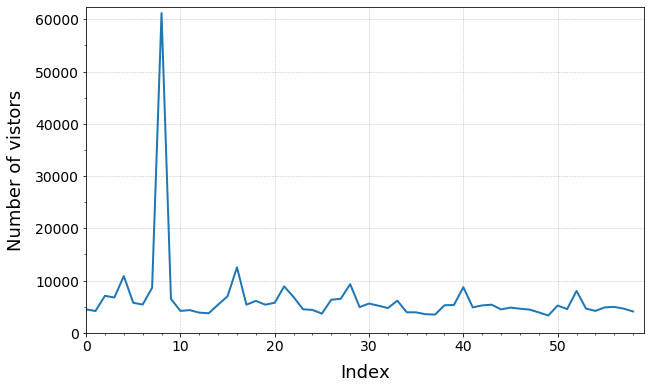

In [0]:
plot = line_chart(plotwidth=10, plothight=6, gridlinewidth=0.5, linewidth=2.0, my_font='DejaVu Sans', 
                  isframe=True, xy_lim=True, ticks = True, tick_direction='out', backgrid=True,
                  title=False, save_image=False)
plot.lineSingle(file='museum_visitors_line.csv', col_name='Firehouse_Museum', x_lable='Index', y_lable='Number of vistors',
                plotwidth=10, plothight=6, gridlinewidth=0.5, linewidth=2.0, xaxis_start=0, yaxis_start=0, 
                isframe=True, my_font='DejaVu Sans', xy_lim=True, ticks = True, tick_direction='out', backgrid=True,
                title=False, save_image=False)

## Multi-line Plot

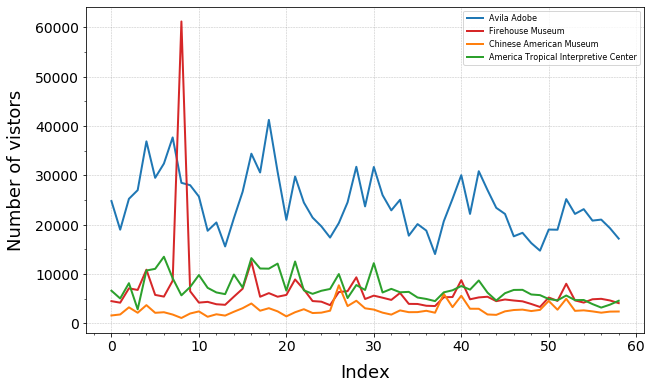

In [0]:
plot = line_chart(plotwidth=10, plothight=6, gridlinewidth=0.5, linewidth=2.0,
                  isframe=True, my_font='DejaVu Sans', xy_lim=True, ticks = True, tick_direction='out',
                  backgrid=True, title=False, save_image=False)
plot.linesMulti(file='museum_visitors_line.csv', col_one='Avila_Adobe', col_two='Firehouse_Museum',
                col_three='Chinese_American_Museum', col_four='America_Tropical_Interpretive_Center',
                legend_lable1="Avila Adobe", legend_lable2 = "Firehouse Museum",
                legend_lable3 = "Chinese American Museum", legend_lable4 = "America Tropical Interpretive Center", 
                x_lable='Index', y_lable='Number of vistors',
                plotwidth=10, plothight=6, gridlinewidth=0.5, linewidth=2, isframe=True, my_font='DejaVu Sans',
                ticks=True, tick_direction='out', backgrid=True, title=False, save_image=False)

## Multi-line With Different Marks Plot

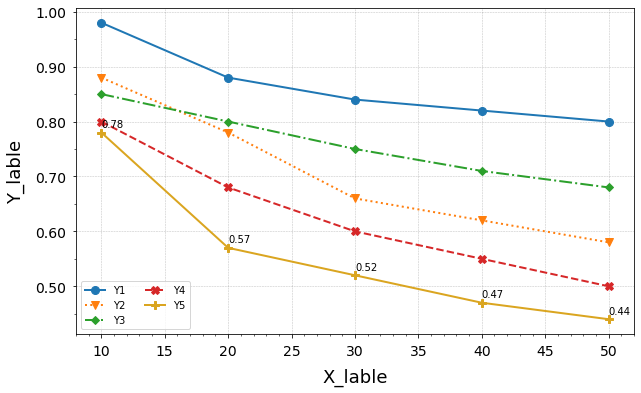

In [0]:
plot = line_chart(plotwidth=10, plothight=6, gridlinewidth=0.5, linewidth=2.0, my_font='DejaVu Sans', 
                  isframe=True, xy_lim=True, ticks = True, tick_direction='out', backgrid=True,
                  title=False, save_image=False)
plot.linesMultimarks(file='linechart_data.csv', x_lable='X_lable', y_lable='Y_lable', plotwidth=10, plothight=6, 
                     gridlinewidth=0.5, linewidth=2.0, legend_size=10, isframe=True, my_font='DejaVu Sans', 
                     ticks = True, tick_direction='out', backgrid=True, title=False, save_image=False)

## Double Axis Line Plot

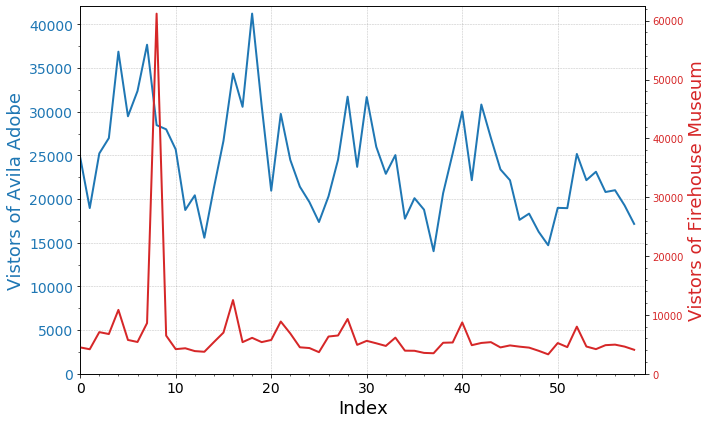

In [0]:
plot = line_chart(plotwidth=10, plothight=6, gridlinewidth=0.5, linewidth=2.0, isframe=True, my_font='DejaVu Sans', 
                  xy_lim=True, ticks = True, tick_direction='out', backgrid=True, title=False, 
                  save_image=False)
plot.linesDoubleaxis(file='museum_visitors_line.csv', col_one='Avila_Adobe', col_two='Firehouse_Museum', 
                     x_lable='Index', y1_lable='Vistors of Avila Adobe', y2_lable='Vistors of Firehouse Museum',
                     plotwidth=10, plothight=6, gridlinewidth=0.5, linewidth=2.0,
                     xaxis_start=0, yaxis_start_left=0, yaxis_start_right=0, isframe=True, my_font='DejaVu Sans',
                     xy_lim=True, ticks=True, tick_direction='out', backgrid=False, title=False, save_image=False)

## Insetplot Line

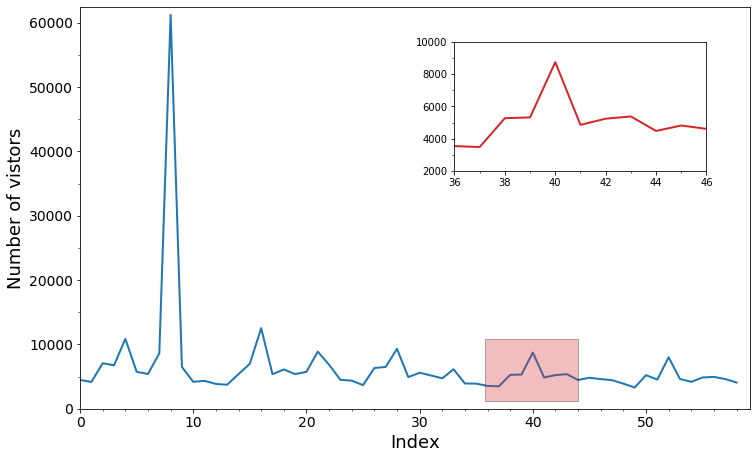

In [0]:
plot = line_chart(plotwidth=10, plothight=6, gridlinewidth=0.5, linewidth=2.0, my_font='DejaVu Sans', 
                  isframe=True, xy_lim=True, ticks = True, tick_direction='out', backgrid=True, title=False, 
                  save_image=False)
plot.lineInsetplot(file='museum_visitors_line.csv', col_name='Firehouse_Museum', x_lable='Index', 
                   y_lable='Number of vistors', plotwidth=8, plothight=6, plotout_xstart=0.0, plotout_ystart=0.0,
                   plotin_xstart=0.52, plotin_ystart=0.55, plotout_width=0.93, plotout_hight=0.93, plotin_width=0.35,
                   plotin_hight=0.3, linewidth=2.0, xaxis_start=0, yaxis_start=0, isframe_out=True, isframe_in=True,
                   my_font='DejaVu Sans', xy_lim=True, ticks_out=True, ticks_in=True, title_out=False, title_in=False,
                   save_image=False)